<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n20.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

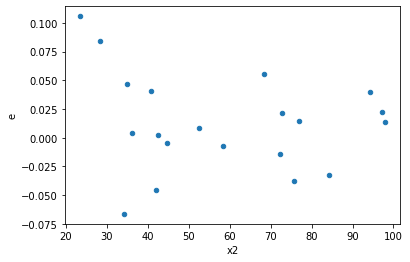

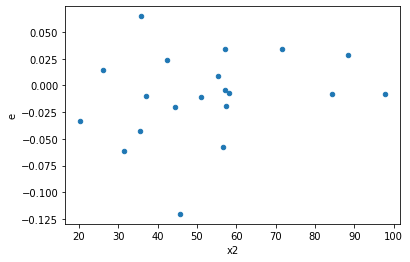

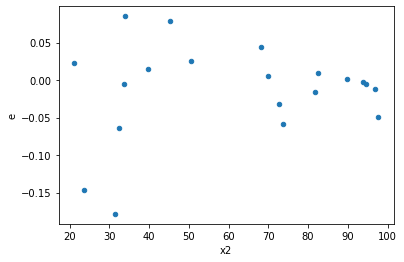

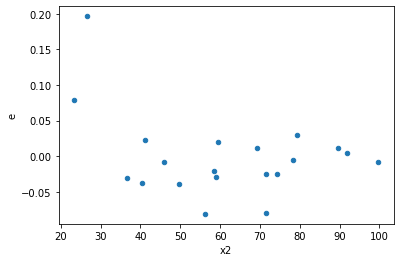

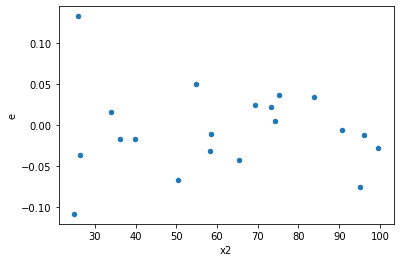

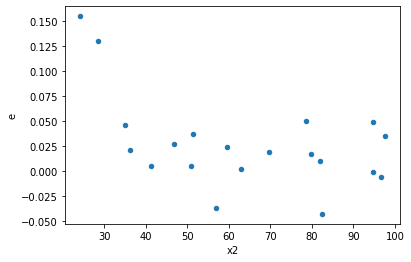

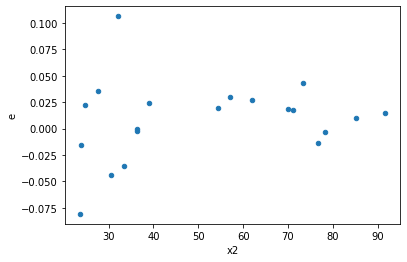

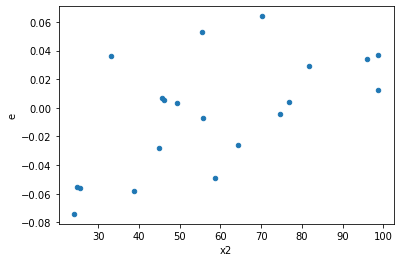

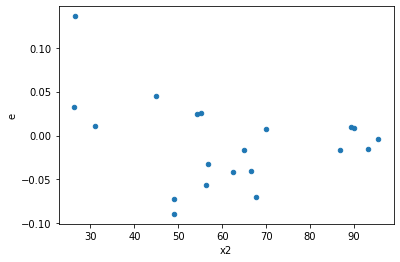

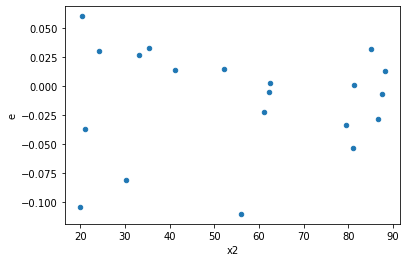

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,6.0,6.0,0.006415643319822812,0.006698757538748961,0.0010692738866371354,0.0011164595897914934,1.0441287342223955,0.9595349982174515,0.5202325008912743,0.47976749910872574,Reject001=1 : Homoscedasticity
20.0,6.0,6.0,0.006848818275777107,0.009317799635929984,0.0011414697126295179,0.0015529666059883307,1.3604974260866531,0.7180695711835556,0.6409652144082222,0.3590347855917778,Reject001=1 : Homoscedasticity
30.0,6.0,6.0,0.0052482329720116554,0.016944813118004092,0.0008747054953352759,0.002824135519667349,3.2286701463843595,0.17954825674904962,0.9102258716254752,0.08977412837452481,Reject001=1 : Homoscedasticity
71.0,6.0,6.0,0.0028991850582149557,0.008411830128849438,0.0004831975097024926,0.0014019716881415731,2.9014464271655185,0.2205760445741778,0.8897119777129111,0.1102880222870889,Reject001=1 : Homoscedasticity
73.0,6.0,6.0,0.004238643456276492,0.004835220087845309,0.000706440576046082,0.0008058700146408847,1.1407470663014647,0.8770797153340952,0.5614601423329524,0.4385398576670476,Reject001=1 : Homoscedasticity
91.0,6.0,6.0,0.006487747825628613,0.008270621790895938,0.0010812913042714354,0.001378436965149323,1.2748062984545148,0.7756860806060621,0.6121569596969689,0.3878430403030311,Reject001=1 : Homoscedasticity
92.0,6.0,6.0,0.006658452240623578,0.007597210522210468,0.0011097420401039297,0.0012662017537017447,1.1409874618998503,0.8768847265856954,0.5615576367071523,0.4384423632928477,Reject001=1 : Homoscedasticity
94.0,6.0,6.0,0.008181855812009274,0.009377839669106628,0.001363642635334879,0.001562973278184438,1.1461751324610117,0.8726888915939477,0.5636555542030262,0.43634444579697385,Reject001=1 : Homoscedasticity
114.0,6.0,6.0,0.005020034580272099,0.006810152448221411,0.0008366724300453498,0.0011350254080369018,1.3565947284475246,0.7205802954831972,0.6397098522584014,0.3602901477415986,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.012305798500767176,0.004110708574140232,0.0020509664167945294,0.0006851180956900387,0.33404647198505316,0.2078778574071864,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.010615965327549218,0.0031570399148510377,0.0017693275545915363,0.0005261733191418396,0.2973860423845097,0.1656458137912965,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.03876654621998571,0.0038432931693728953,0.006461091036664285,0.0006405488615621492,0.09913942675119002,0.012762127088383814,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,0.018525857354062068,0.0027234430714199063,0.003087642892343678,0.0004539071785699844,0.1470076671416641,0.034426697991190615,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.03779007371525534,0.003000379108041876,0.006298345619209223,0.000500063184673646,0.07939595806691066,0.00710708768040964,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,0.006415643319822812,0.006698757538748961,0.0010692738866371354,0.0011164595897914934,1.0441287342223955,0.9595349982174515,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.013582592670866162,0.0006741255393024942,0.0022637654451443602,0.00011235425655041569,0.04963158033506023,0.0019672975352185993,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,0.006521891332058975,0.0036104427797370637,0.0010869818886764958,0.0006017404632895106,0.553588306813637,0.49015430351155803,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.015412189886885504,0.003379027733533808,0.0025686983144809173,0.0005631712889223013,0.2192438425904083,0.08717895262393237,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      848
Reject001=0 : Heteroscedasticity    152
Name: Result_test, dtype: int64